# **Data Science And Astronomy**

One of the biggest questions out there, are we alone in the Universe?
Well, to answer this question we need to find an exoplanet that fits the parameters to sustain life as we know it. Futhermore, if we are ever going to be a space fairing civilization, we need to find the closest planet out there to the Sun.

In the words of Niel Degrass Tyson:

**The atoms of our bodies are traceable to stars that manufactured them in their cores and exploded these enriched ingredients across our galaxy, billions of years ago. For this reason, we are biologically connected to every other living thing in the world. We are chemically connected to all molecules on Earth. And we are atomically connected to all atoms in the universe. We are not figuratively, but literally stardust.**\
(https://www.goodreads.com/quotes/484586-the-atoms-of-our-bodies-are-traceable-to-stars-that)
## **Are there any Earth-like Exoplanets?**

Please reference this article for what makes Earth, well, Earth!\
My professor is also mentioned in it!\
https://www.space.com/5595-earth-special-compared-planets.html

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px;
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')

# mounting drive
from google.colab import drive
drive.mount("/content/drive")
# retiving the dataset
path = "/content/drive/My Drive/Personal_Database/exoplanet_catalog.csv"

data = pd.read_csv(path)
print(data.head(3))

# checking for and removing null values
print(data.isnull().values.any())
print(data.info())
print(data.shape)

Mounted at /content/drive
     # name planet_status  ...  star_magnetic_field    star_alternate_names
0  11 Com b     Confirmed  ...                  NaN                     NaN
1  11 Oph b     Confirmed  ...                  NaN  Oph 1622-2405, Oph 11A
2  11 UMi b     Confirmed  ...                  NaN                     NaN

[3 rows x 98 columns]
True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7136 entries, 0 to 7135
Data columns (total 98 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   # name                      7136 non-null   object 
 1   planet_status               7136 non-null   object 
 2   mass                        1488 non-null   float64
 3   mass_error_min              1351 non-null   float64
 4   mass_error_max              1330 non-null   float64
 5   mass_sini                   1091 non-null   float64
 6   mass_sini_error_min         927 non-null    float64
 7   mass_sini_error_m

# **Exploratory Data Analysis**

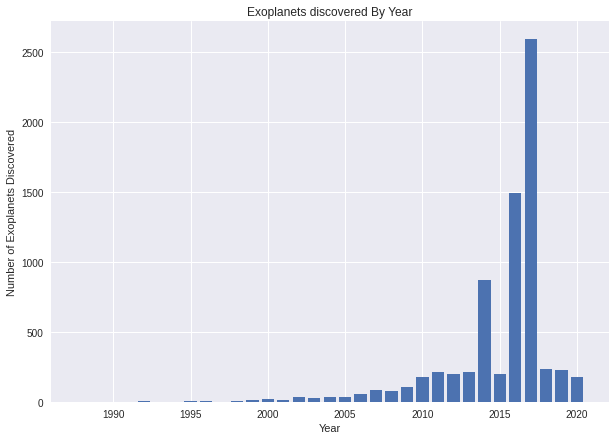

In [ ]:
# when were most of the planets discorvered
plt.style.use("seaborn")

discovered = data["discovered"].value_counts()


plt.figure(figsize=(10,7))
plt.bar(discovered.index, discovered.values)
plt.xlabel("Year")
plt.ylabel("Number of Exoplanets Discovered")
plt.title("Exoplanets discovered By Year");

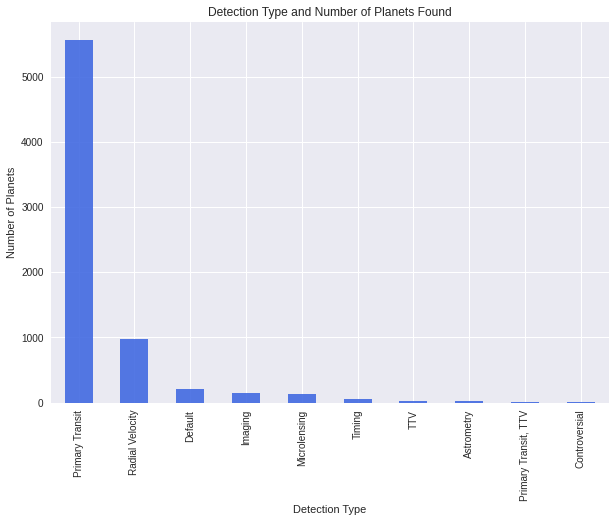

In [ ]:
# Which detection type found the most exoplanets

detection = data["detection_type"].value_counts()
detection.head()

fig, ax = plt.subplots(figsize = (10,7))
detection.plot.bar(color = "royalblue", alpha = 0.9)
plt.title("Detection Type and Number of Planets Found")
plt.ylabel("Number of Planets")
plt.xlabel("Detection Type");

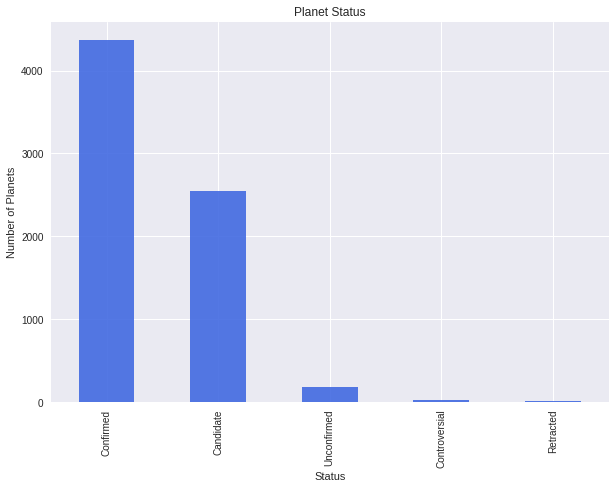

In [ ]:
# Planet Status

status = data["planet_status"].value_counts()
status.head()

fig, ax = plt.subplots(figsize = (10,7))
status.plot.bar(color = "royalblue", alpha = 0.9)
plt.title("Planet Status")
plt.ylabel("Number of Planets")
plt.xlabel("Status");

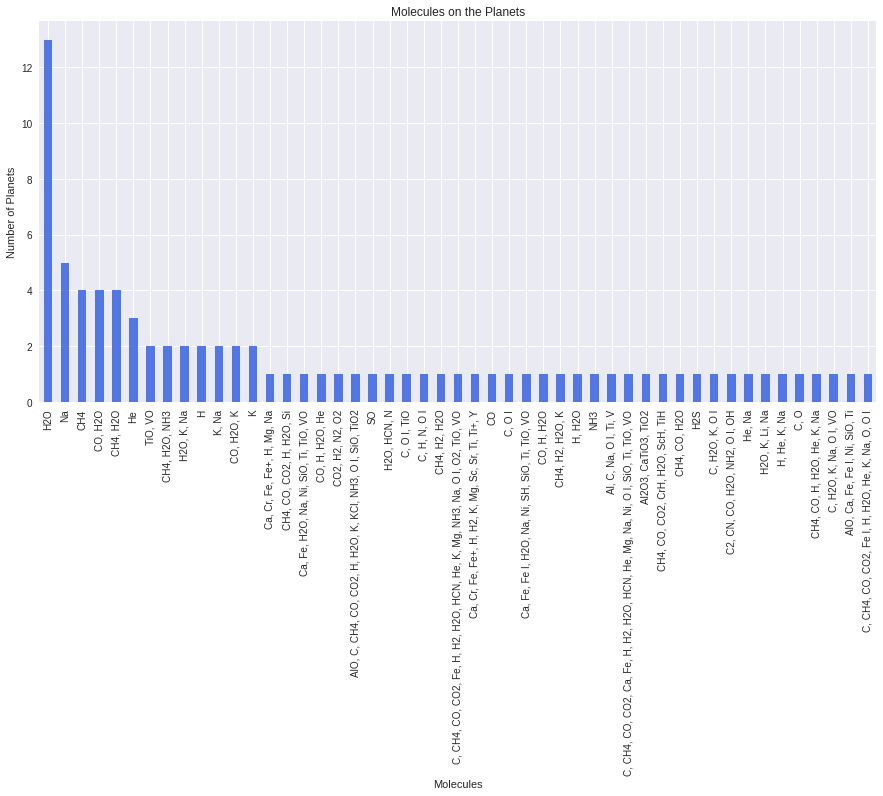

In [ ]:
# Molecules on the Planets

molecules = data["molecules"].value_counts()
molecules.head()

fig, ax = plt.subplots(figsize = (15,7))
molecules.plot.bar(color = "royalblue", alpha = 0.9)
plt.title("Molecules on the Planets")
plt.ylabel("Number of Planets")
plt.xlabel("Molecules");

# **Relationship Between Variables**

In [ ]:
# Pairplot took to long, so decided to comment it out
# sns.pairplot(data)

In [ ]:
print(data.size)

699328


In [ ]:
# dropping columns that will not be used further
dropped_data = data.drop(columns=["mass_sini","mass_error_min", "mass_error_max", "mass_sini_error_min", "mass_sini_error_max", "radius_error_min",
                          "radius_error_max", "orbital_period_error_min", "orbital_period_error_max", "semi_major_axis_error_min",
                          "semi_major_axis_error_max", "eccentricity_error_min", "eccentricity_error_max", "inclination_error_min",
                          "inclination_error_max", "omega_error_min", "omega_error_max", "tperi_error_min", "tperi_error_max",
                          "tconj_error_min", "tconj_error_max", "tzero_tr_error_min", "tzero_tr_error_max", "tzero_tr_sec_error_min",
                          "geometric_albedo_error_min", "geometric_albedo_error_max", "mass_detection_type", "star_distance_error_min",
                          "star_distance_error_max", "star_metallicity_error_min", "star_metallicity_error_max", "star_mass_error_min",
                          "star_mass_error_max", "star_radius_error_min", "star_radius_error_max", "star_age_error_min", "star_age_error_max",
                          "star_teff_error_min", "star_teff_error_max", "tzero_tr_sec_error_max", "lambda_angle_error_min", "lambda_angle_error_max",
                          "impact_parameter_error_min", "impact_parameter_error_max", "tzero_vr_error_min", "tzero_vr_error_max", "k_error_min",
                          "k_error_max", "temp_calculated_error_min", "temp_calculated_error_max", "semi_major_axis", "inclination",
                          "omega", "tperi", "tconj", "tzero_tr", "tzero_tr_sec", "lambda_angle", "impact_parameter", "tzero_vr", "k", "hot_point_lon",
                          "geometric_albedo",	"log_g", "alternate_names", "ra",	"dec",	"mag_i", "mag_j",	"mag_h", "mag_k", "discovered", "updated",
                          "temp_calculated", "temp_measured", "detection_type", "molecules", "star_detected_disc", "star_alternate_names"])
dropped_data.head(3)
print(dropped_data.size)
print(dropped_data.index)

135584
RangeIndex(start=0, stop=7136, step=1)


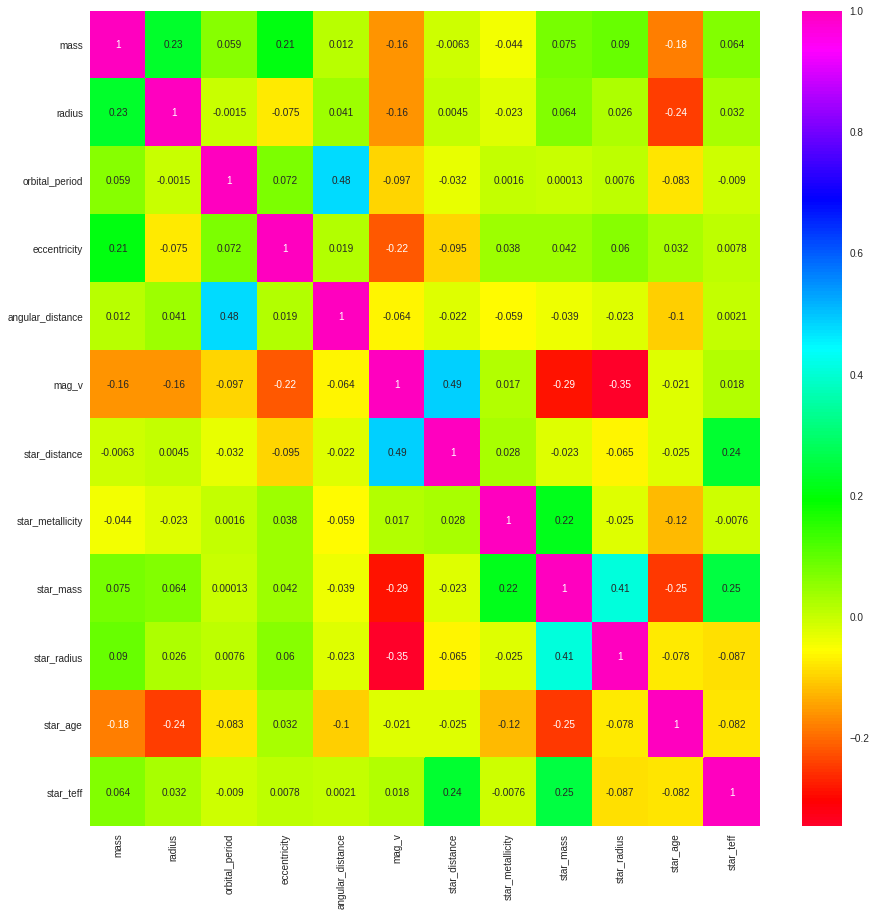

In [ ]:
# looking for correlation between features from impact dataset
corr = dropped_data.corr()
corr_features = corr.index
plt.figure(figsize = (15,15))
a = sns.heatmap(dropped_data[corr_features].corr(),annot = True, cmap = "gist_rainbow")

As we can see, there is not a significant correlation between any of the columns. So, we will have to rely on outside resources to predict if a planet is Earth-like or not.

References: 

1. https://exoplanets.nasa.gov/what-is-an-exoplanet/how-do-we-find-habitable-planets/
2.https://en.wikipedia.org/wiki/List_of_potentially_habitable_exoplanets

**A critical feature to predict if a planet is potentially Earth-like is to determine if the exoplanet lies in the Habitable Zone. Water can only exist in liquid form in this region. And life as we know it, requires liquid water to survive.**

# **Calculating The Habitable Zone(HZ) For Each Star**

1. Calculate Orbital Radius of Planet
https://www.sfu.ca/colloquium/PDC_Top/astrobiology/discovering-exoplanets/calculating-exoplanet-properties.html

2. Assign Bolometric Correction Values Based on Star Type

In [ ]:
# Orbital Radius using the formula from: 

df = dropped_data

df["Orbital_Radius"] = (df.orbital_period) * df.orbital_period
df["mass_G"] = (6.67259 * 10**-11)*(df.mass + df.star_mass)
df["Orbital_Radius"] = df["Orbital_Radius"] * df["mass_G"]
df["Orbital_Radius"] = (df["Orbital_Radius"]/(4*6.28))** (1. / 3)

df = df.drop(["mass_G"], axis = 1)

df.head()

# Correction Values Based on Star Type

df["star_sp_type"] = df["star_sp_type"].astype(str)
df['Spectral_Type'] = df['star_sp_type'].astype(str).str.get(0)

# create dictionary of corrections to integer mapping
corrections = {'B':-2, 
            'A':-0.3, 
            'F':-0.15, 
            'G':-0.4, 
            'K':-0.8, 
            'M':-2}
# apply using map
df['Bolometric_Correction'] = df.Spectral_Type.map(corrections)
df.drop(["star_sp_type"], axis = 1, inplace = True)

# create dictionary of values for spectral type to integer mapping
spec = {'B':0, 
            'A': 1, 
            'F': 2, 
            'G': 3, 
            'K': 4, 
            'M': 5}

df["Star_Spectral_Num"] = df.Spectral_Type.map(spec)
df.head()

,# name,planet_status,mass,radius,orbital_period,eccentricity,angular_distance,publication,radius_detection_type,star_name,mag_v,star_distance,star_metallicity,star_mass,star_radius,star_age,star_teff,star_magnetic_field,Orbital_Radius,Spectral_Type,Bolometric_Correction,Star_Spectral_Num
0,11 Com b,Confirmed,NaN,NaN,326.03,0.231,0.011664,Published in a refereed paper,NaN,11 Com,4.74,110.6,-0.350,2.7000,19.00,NaN,4742.0,NaN,NaN,G,-0.4,3.0
1,11 Oph b,Confirmed,21.00,NaN,730000.00,NaN,1.675862,Published in a refereed paper,NaN,11 Oph,NaN,145.0,NaN,0.0162,NaN,0.011,2375.0,NaN,3.098548,M,-2.0,5.0
2,11 UMi b,Confirmed,NaN,NaN,516.22,0.080,0.012887,Published in a refereed paper,NaN,11 UMi,5.02,119.5,0.040,1.8000,24.08,1.560,4340.0,NaN,NaN,K,-0.8,4.0
3,11 Uma b,Unconfirmed,3.72,NaN,651.90,0.700,0.049367,Published in a refereed paper,NaN,11 Uma,5.16,31.6,-0.245,1.8100,36.30,NaN,4090.0,NaN,0.018413,K,-0.8,4.0
4,14 And b,Confirmed,NaN,NaN,185.84,0.000,0.010864,Published in a refereed paper,NaN,14 And,5.22,76.4,-0.240,2.2000,11.00,NaN,4813.0,NaN,NaN,K,-0.8,4.0


3. The following method for HZ calculation is taken from:
https://www.planetarybiology.com/calculating_habitable_zone.html

In [ ]:
# 1. calculating the absilute visual magnitude
#    Star distance needs to be in parsecs. 1 AU = 4.84814e-6 parsecs
import math
import numpy as np
df["Star_distance_Parsec"] = df["star_distance"] * (4.84814 * 10**-6)
df["Star_distance_Parsec"] = df["Star_distance_Parsec"].astype(float)
data["mag_v"] = data["mag_v"].astype(float)
a = (5 * np.log(df["Star_distance_Parsec"]/10))
df["AVM"] = data["mag_v"] - a

# 2. Calculate bolometric magnitude

df["Bolometric_Magnitude"] = df["AVM"] - df["Bolometric_Correction"]

# 3. Calculate absolute luminosity
#    The bolometric magnitude of the sun = 4.72
#    2.5 is a constant value used for comparing stellar luminosities -- known as "Pogson's Ratio."

b = (df["Bolometric_Magnitude"] - 4.72)/-2.5

df["Absolute_Luminosity"] = 10**b

# 4. Approximate the boundaries of the habitable zone for this star

#    1.1 is a constant value representing stellar flux at the 
#    inner radius (based on Kasting et al., 1993, cited below; Whitmire et al., 1996, cited below)

#    0.53 is a constant value representing stellar flux at the outer radius 
#    (based on Kasting et al., 1993, cited below; Whitmire et al., 1996., cited below)

df["Absolute_Luminosity"] = df["Absolute_Luminosity"].astype(float)
df["Inner_HZ"] = np.sqrt(df["Absolute_Luminosity"]/1.1)
df["Outer_HZ"] = np.sqrt(df["Absolute_Luminosity"]/.53)


# Changing HZ units from parsec to AU: 1 parsec = 206265 AU

df["Inner_HZ"] = (df["Inner_HZ"] * 206265)
df["Outer_HZ"] = (df["Outer_HZ"] * 206265)
df.head()
print(df.size)

199808


# **Creating target variable by checking if the oribital radius of planet lies in the habitable zone**
If orbital radius of the planet lies within the habitable zone we will assign a value of 1 to it. If not, we assign a 0

In [ ]:
df_model = df[["# name", "mass", "orbital_period","Orbital_Radius", "star_name", "star_distance", "star_metallicity", "star_mass", "star_radius", "star_age", "Star_Spectral_Num", "Inner_HZ", "Outer_HZ"]]

# creating numpy arrays to encode into target column
Orbital_Radius = df_model['Orbital_Radius'].to_numpy()
Inner_HZ = df_model['Inner_HZ'].to_numpy()
Outer_HZ = df_model['Outer_HZ'].to_numpy()

target = np.where((Orbital_Radius <= Inner_HZ) & (Orbital_Radius >= Outer_HZ), 1, 0)
df_model['target'] = pd.DataFrame(target)
df_model.head()

,# name,mass,orbital_period,Orbital_Radius,star_name,star_distance,star_metallicity,star_mass,star_radius,star_age,Star_Spectral_Num,Inner_HZ,Outer_HZ,target
0,11 Com b,NaN,326.03,NaN,11 Com,110.6,-0.350,2.7000,19.00,NaN,3.0,2.377655e-05,0.000034,0
1,11 Oph b,21.00,730000.00,3.098548,11 Oph,145.0,NaN,0.0162,NaN,0.011,5.0,NaN,NaN,0
2,11 UMi b,NaN,516.22,NaN,11 UMi,119.5,0.040,1.8000,24.08,1.560,4.0,2.077519e-05,0.000030,0
3,11 Uma b,3.72,651.90,0.018413,11 Uma,31.6,-0.245,1.8100,36.30,NaN,4.0,9.107219e-07,0.000001,0
4,14 And b,NaN,185.84,NaN,14 And,76.4,-0.240,2.2000,11.00,NaN,4.0,6.764121e-06,0.000010,0


In [ ]:
df_model.shape

(7136, 14)

In [ ]:
df_model["target"].unique()

array([0])

In [ ]:
df_model["Inner_HZ"] = (df["Inner_HZ"] * 206265)
df_model["Outer_HZ"] = (df["Outer_HZ"] * 206265)

Looks like none of the planets found by Kepler lie in the habitable zone of thier host star

## **Let's Fit A Model To Make Predictions**

In [ ]:
# adding Earth parameters to the data
df_model.loc[len(df_model.index)] = ['Earth', 0.00314, 365, 1, "Sun", 1, 0.012, 1, 1, 5, 3, 0.95, 1.4, 1]


In [ ]:
# getting the data ready
df_model = df_model.dropna()
'''df_model["mass"] = df_model["mass"].astype(int)
df_model["orbital_period"] = df_model["orbital_period"].astype(int)
df_model["Orbital_Radius"] = df_model["Orbital_Radius"].astype(int)
df_model["star_metallicity"] = df_model["star_metallicity"].astype(int)
df_model["star_distance"] = df_model["star_distance"].astype(int)
df_model["star_mass"] = df_model["star_mass"].astype(int)
df_model["star_radius"] = df_model["star_radius"].astype(int)
df_model["star_age"] = df_model["star_age"].astype(int)
df_model["Star_Spectral_Num"] = df_model["Star_Spectral_Num"].astype(int)
df_model["Inner_HZ"] = df_model["Inner_HZ"].astype(int)
df_model["Outer_HZ"] = df_model["Outer_HZ"].astype(int)
df_model["target"] = df_model["target"].astype(int)'''
model = df_model
model.drop(["# name", "star_name"], axis = 1, inplace=True)
model.tail()

,mass,orbital_period,Orbital_Radius,star_distance,star_metallicity,star_mass,star_radius,star_age,Star_Spectral_Num,Inner_HZ,Outer_HZ,target
7123,0.01100,94.11000,0.002653,3.65,-0.550,0.783,0.793,5.8,3.0,0.003368,0.004852,0
7131,0.62000,4.61711,0.000475,13.47,0.090,1.270,1.631,3.8,2.0,0.058226,0.083884,0
7132,9.10000,240.93700,0.011694,13.47,0.090,1.270,1.631,3.8,2.0,0.058226,0.083884,0
7133,23.58000,1281.43900,0.047680,13.47,0.090,1.270,1.631,3.8,2.0,0.058226,0.083884,0
7136,0.00314,365.00000,1.000000,1.00,0.012,1.000,1.000,5.0,3.0,0.950000,1.400000,1


In [ ]:
# x and y 

X = model.drop(["target"], axis = 1)
y = model["target"]
print(X)
X = np.array(X)
y = np.array(y)

          mass  orbital_period  ...  Inner_HZ  Outer_HZ
6      2.10000     6906.000000  ...  0.025976  0.037422
68     0.47000        4.230800  ...  0.033304  0.047980
69     0.84000       14.653140  ...  0.014980  0.021580
72     0.02703        0.736548  ...  0.014980  0.021580
105    0.05130       41.685500  ...  0.475546  0.685095
...        ...             ...  ...       ...       ...
7123   0.01100       94.110000  ...  0.003368  0.004852
7131   0.62000        4.617110  ...  0.058226  0.083884
7132   9.10000      240.937000  ...  0.058226  0.083884
7133  23.58000     1281.439000  ...  0.058226  0.083884
7136   0.00314      365.000000  ...  0.950000  1.400000

[359 rows x 11 columns]


In [ ]:
X

array([[2.10000000e+00, 6.90600000e+03, 7.24352121e-02, ...,
        4.00000000e+00, 2.59756338e-02, 3.74217903e-02],
       [4.70000000e-01, 4.23080000e+00, 4.21948028e-04, ...,
        3.00000000e+00, 3.33044073e-02, 4.79799860e-02],
       [8.40000000e-01, 1.46531400e+01, 1.01896681e-03, ...,
        4.00000000e+00, 1.49796006e-02, 2.15803578e-02],
       ...,
       [9.10000000e+00, 2.40937000e+02, 1.16937423e-02, ...,
        2.00000000e+00, 5.82263016e-02, 8.38837067e-02],
       [2.35800000e+01, 1.28143900e+03, 4.76795730e-02, ...,
        2.00000000e+00, 5.82263016e-02, 8.38837067e-02],
       [3.14000000e-03, 3.65000000e+02, 1.00000000e+00, ...,
        3.00000000e+00, 9.50000000e-01, 1.40000000e+00]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X.shape

(359, 11)

In [ ]:
y.shape

(359,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,  y_test = train_test_split(X,y,test_size = 0.2, random_state = 43)

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

1.0

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf.score(x_test, y_test)

1.0

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## **Evaluating the Machine Learning Model**

In [ ]:
# using the scoring parameter

from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y)

array([1.        , 1.        , 1.        , 0.98611111, 1.        ])

In [ ]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



**Cross Validation test our model on 5 different variations on our testing and training dataset. Based on our cv scores, we observe that 4/5 versions give us a perfect score for accuracy, while 1 gives a nearly perfect socre. This can be account for by lack of enough exoplanets that are Earth-like, i.e; lack of data indicating a target score of 1.**

**Hence, the model predicts the one record of Earth-like planet(Earth itself) incorrectly based on our model.**